In [1]:
# Load packages
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import scipy as scp
import scipy.stats as scps
import pickle
import matplotlib.pyplot as plt
from datetime import datetime

# Load my own functions
#import dnnregressor_train_eval_keras as dnnk
#from kde_training_utilities import kde_load_data
import make_data_wfpt as mdw

/home/afengler/miniconda3/envs/pytorch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/afengler/miniconda3/envs/pytorch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/afengler/miniconda3/envs/pytorch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/afengler/miniconda3/envs/pyt

In [2]:
import samplers.diagnostics as diag_


In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [4]:
pd.__version__

'0.25.3'

In [ ]:
inputs = Input(shape = (7,))
x = Dense(20, activation = 'relu')(inputs)
x = Dense(40, activation = 'relu')(x)
x = Dense(60, activation = 'relu')(x)
x = Dense(80, activation = 'relu')(x)
x = Dense(100, activation = 'relu')(x)
x = Dense(120, activation = 'relu')(x)
predictions = Dense(1, activation = 'linear')(x)
model = Model(inputs = inputs, outputs = predictions)
model.compile(optimizer = 'nadam',
              loss = 'mse',
              metrics = ['mse'])

In [ ]:
data = np.random.uniform(low = -1, high = 1, size = ((100000000, 7)))
labels = np.matmul(data, np.array([1, 2, 3, 4, 5, 6, 7]))
labels = labels + np.random.normal(loc = 0, scale = 0.1, size = 100000000)
#labesl = np.random.uniform(low = -1, high = 1, size = ((100000000, 1)))

In [ ]:
data_test = np.random.uniform(low = -1, high = 1, size = ((10000000, 7)))
labels_test = np.matmul(data_test, np.array([1, 2, 3, 4, 5, 6, 7]))
labels_test = labels_test + np.random.normal(loc = 0, scale = 0.1, size = 10000000)

In [ ]:
out = model.fit(data[:,:7],
                  labels,
                  epochs = 20,
                  validation_data = ((data_test, labels_test)),
                  batch_size = 200000)

In [ ]:
from scipy.stats import gamma
from scipy.stats import weibull

In [ ]:
gamma.(1, a = 1, scale = 0.1)

In [ ]:
weibull.pdf(a = 1, scale = 0.1)

In [ ]:
np.power(3, 1/3)

In [ ]:
(0) ** (1/3)

In [ ]:
a = ['a', 'b', 'c'] + ['d', 'e']

In [ ]:
dir_ = '/home/afengler/git_repos/nn_likelihoods/data_storage/kde/weibull/train_test_data/'
files_ = os.listdir(dir_)
files_.sort()
test_label_files = []
train_label_files = []
test_features_files = []
train_features_files = []

for file_ in files_:
    if file_[:6] == 'test_l':
        test_label_files.append(file_)
    if file_[:6] == 'test_f':
        test_features_files.append(file_)
    if file_[:7] == 'train_l':
        train_label_files.append(file_)
    if file_[:7] == 'train_f':
        train_features_files.append(file_)

In [ ]:
test_label_files.pop(0)
test_features_files.pop(0)
train_label_files.pop(0)
train_features_files.pop(0)

In [ ]:
test_label_files
train_label_files

In [ ]:
data = pd.concat([pd.read_pickle(dir_ + file_) for file_ in test_label_files])
data.reset_index(drop = True, inplace = True)
data.to_pickle('/home/afengler/git_repos/nn_likelihoods/data_storage/kde/weibull/train_test_data/test_labels.pickle',
              protocol = 4)

In [ ]:
data = pd.concat([pd.read_pickle(dir_ + file_) for file_ in test_features_files])
data.reset_index(drop = True, inplace = True)
data.to_pickle('/home/afengler/git_repos/nn_likelihoods/data_storage/kde/weibull/train_test_data/test_features.pickle',
              protocol = 4)

In [ ]:
data = pd.concat([pd.read_pickle(dir_ + file_) for file_ in train_features_files])
data.reset_index(drop = True, inplace = True)
data.to_pickle('/home/afengler/git_repos/nn_likelihoods/data_storage/kde/weibull/train_test_data/train_features.pickle',
              protocol = 4)

In [ ]:
data = pd.concat([pd.read_pickle(dir_ + file_) for file_ in train_label_files])
data.reset_index(drop = True, inplace = True)
data.to_pickle('/home/afengler/git_repos/nn_likelihoods/data_storage/kde/weibull/train_test_data/train_labels.pickle',
              protocol = 4)

In [ ]:
data.to_pickle('/home/afengler/git_repos/nn_likelihoods/data_storage/kde/weibull/train_test_data/train_labels.pickle',
              protocol = 4)

In [ ]:
train_features, train_labels, test_features, test_labels = kde_load_data(folder = '/home/afengler/git_repos/nn_likelihoods/data_storage/kde/weibull/train_test_data/')

In [ ]:
train_features.shape

In [ ]:
train_labels.shape

In [ ]:
test_features.shape

In [ ]:
test_labels.shape

In [ ]:
test_file = train_features.values

In [ ]:
test_file.shape

In [ ]:
177986205 + 19768803

In [ ]:
#np.random.normal(size = (10, 10))
t = pd.DataFrame(np.random.normal(size = (10, 10)))

In [ ]:
t.reset_index(drop = True, inplace = True)

In [ ]:
np.random.shuffle(t.values)

In [ ]:
t

In [2]:
import kde_training_utilities as kde_utils

In [3]:
kde_utils.kde_make_train_test_split(folder = '/home/afengler/git_repos/nn_likelihoods/data_storage/kde/linear_collapse/train_test_data/')

writing test labels to file
writing test features to file
writing train labels to file
writing train features to file


'success'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
tada = np.random.uniform(low = 0, high = 50, size = 50000)


(array([56., 58., 42., 46., 55., 45., 49., 55., 50., 55., 60., 67., 54.,
        42., 50., 47., 49., 42., 53., 42., 49., 36., 49., 51., 57., 52.,
        57., 59., 48., 52., 53., 49., 51., 50., 51., 35., 52., 50., 53.,
        50., 55., 48., 54., 58., 46., 42., 58., 56., 44., 46., 61., 44.,
        38., 56., 51., 43., 72., 46., 49., 48., 39., 47., 37., 52., 51.,
        58., 49., 48., 60., 59., 54., 48., 49., 53., 38., 55., 46., 42.,
        44., 41., 54., 61., 56., 45., 44., 39., 54., 58., 54., 56., 57.,
        43., 56., 64., 48., 55., 50., 47., 47., 40., 53., 45., 38., 42.,
        30., 45., 55., 66., 51., 58., 58., 55., 44., 64., 63., 56., 48.,
        50., 39., 40., 62., 48., 34., 52., 42., 44., 52., 51., 51., 52.,
        61., 62., 48., 50., 54., 60., 48., 43., 61., 49., 52., 47., 49.,
        50., 42., 47., 62., 55., 52., 35., 57., 57., 56., 48., 41., 56.,
        48., 42., 44., 48., 36., 53., 47., 47., 50., 43., 52., 50., 47.,
        55., 55., 47., 56., 57., 43., 48., 52., 44.

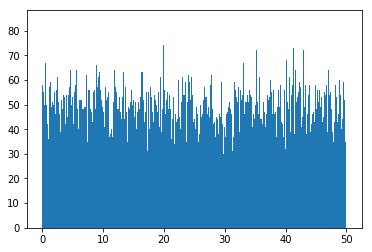

In [8]:
plt.hist(tada, bins = 1000)

In [1]:
mylist = []

In [4]:
import numpy as np


(2,)

In [6]:
mylist.append(np.array([1,1]))

In [7]:
mylist

[array([1, 1]), array([1, 1])]

In [10]:
np.random.uniform(size = 2)

array([0.53072802, 0.27524779])

In [11]:
[0] * 3

[0, 0, 0]

In [12]:
np.array([0]*3)

array([0, 0, 0])

In [9]:
test_list = ['a', 'v', 'w']

In [18]:
test_list.index('a')

0

In [34]:
def adjust_params_for_multiple_subjects(params = ['v', 'a', 'w'], 
                                        params_bounds = [(0,1), (0, 2), (0, 1)], 
                                        params_vary = ['v', 'w'],
                                        n_subjects = 3):
    params_adj = []
    params_bounds_adj = []
    cnt = 0
    for p in params:
        if p in params_vary:
            for i in range(n_subjects):
                params_adj.append(p + '_' + str(i))
                params_bounds_adj.append(params_bounds[cnt])
        else:
            params_adj.append(p)
            params_bounds_adj.append(params_bounds[cnt])
        cnt += 1
    return params_adj, params_bounds_adj

In [35]:
adjust_params_for_multiple_subjects()

(['v_0', 'v_1', 'v_2', 'a', 'w_0', 'w_1', 'w_2'],
 [(0, 1), (0, 1), (0, 1), (0, 2), (0, 1), (0, 1), (0, 1)])

In [45]:
def get_subj_params(params = [0, 1, 2, 3, 4],
                   params_ordered = ['v', 'a', 'w'],
                   param_varies = [0, 0, 1],
                   params_names = ['v', 'a', 'w_0', 'w_1', 'w_2'],
                   subj_idx = 0):
    # Get parameters for current dataset
        n_params = len(params_ordered)
        params_tmp = []
        for j in range(n_params):
            if param_varies[j] == 1:
                params_tmp.append(params[params_names.index(params_ordered[j] + '_' + str(subj_idx))])
            else:
                params_tmp.append(params[params_names.index(params_ordered[j])])
        return params_tmp

In [46]:
get_subj_params()

[0, 1, 2]

In [8]:
cnt = 0
while True:
    cnt += 1
    if cnt > 10:
        print(cnt)
        break

11


In [10]:
def calculate_weights(self):
        out = self.p.starmap(self.target, zip(self.particles, self.data_tile))
        return np.fromiter(out, np.float)

    def sample(self, data, num_particles = 10000, max_iter = 20):
        self.particles = np.zeros((num_particles, self.dims))

        self.data = data
        self.data_tile = np.tile(self.data, (self.particles.shape[0], 1, 1))
        self.p = mp.Pool(mp.cpu_count())

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [28]:
data = np.random.uniform(size = (10,5))

In [29]:
particles = np.ones((10, 5))

In [38]:
my_tile = np.tile(data, (particles.shape[0], 1, 1))

In [43]:
for j in zip(particles, my_tile):
    print(j)

(array([1., 1., 1., 1., 1.]), array([[0.57238097, 0.67623494, 0.78288829, 0.67937377, 0.7936706 ],
       [0.30049997, 0.86235713, 0.26035501, 0.57428152, 0.52260716],
       [0.69369302, 0.9290034 , 0.94152368, 0.4315618 , 0.74936872],
       [0.26012553, 0.08012147, 0.10086657, 0.47626701, 0.78529835],
       [0.08812225, 0.4056827 , 0.75775738, 0.32627397, 0.55574205],
       [0.44218858, 0.16884444, 0.97674247, 0.34895098, 0.59240901],
       [0.70592777, 0.50837883, 0.08340832, 0.96430742, 0.35946586],
       [0.83536121, 0.81687745, 0.59137712, 0.56383022, 0.8255326 ],
       [0.05355611, 0.03065841, 0.41643992, 0.53558903, 0.58171467],
       [0.25193875, 0.34300263, 0.23430708, 0.91700736, 0.91331397]]))
(array([1., 1., 1., 1., 1.]), array([[0.57238097, 0.67623494, 0.78288829, 0.67937377, 0.7936706 ],
       [0.30049997, 0.86235713, 0.26035501, 0.57428152, 0.52260716],
       [0.69369302, 0.9290034 , 0.94152368, 0.4315618 , 0.74936872],
       [0.26012553, 0.08012147, 0.1008665

In [44]:
np.random.uniform(0, 1, 3)

array([0.11128695, 0.48407282, 0.82680959])

In [5]:
os.listdir('/media/data_cifs/afengler/data/kde/ornstein/method_comparison/')

['_expanded_bounds__7.pickle',
 '.ipynb_checkpoints',
 '_expanded_bounds__6.pickle',
 '_expanded_bounds__11.pickle',
 '_expanded_bounds__4.pickle',
 '_expanded_bounds__9.pickle',
 '_expanded_bounds__18.pickle',
 '_expanded_bounds__16.pickle',
 '_expanded_bounds__3.pickle',
 '_expanded_bounds__15.pickle',
 '_expanded_bounds__23.pickle',
 '_expanded_bounds__2.pickle',
 '_expanded_bounds__20.pickle',
 '_expanded_bounds__13.pickle',
 '_expanded_bounds__25.pickle',
 'ornstein_uhlenbeck_kde_sim_random.pickle',
 '_expanded_bounds__10.pickle',
 '_expanded_bounds__22.pickle',
 '_expanded_bounds__21.pickle',
 '_expanded_bounds__19.pickle',
 '_expanded_bounds_test__999.pickle',
 '_expanded_bounds__1.pickle',
 '_expanded_bounds__5.pickle',
 '_expanded_bounds__17.pickle',
 '_expanded_bounds__12.pickle',
 '_expanded_bounds__8.pickle',
 '_expanded_bounds__24.pickle',
 '_expanded_bounds__14.pickle']

In [3]:
t = pickle.load(open('/media/data_cifs/afengler/data/kde/ornstein/method_comparison/_expanded_bounds_test__999.pickle', 'rb'))

In [27]:
t[2]

array([[[-0.60803503,  1.15883852,  0.30277242, -0.54329505,
          1.16506866],
        [-0.6251384 ,  1.2038119 ,  0.58977254,  0.25235419,
          0.45398726],
        [ 1.79101753,  1.54192591,  0.40756767,  0.78925179,
          1.47303705],
        ...,
        [-1.63028195,  1.53487474,  0.60488254,  0.94356938,
          1.55713028],
        [ 0.85522472,  1.27985177,  0.7846262 ,  0.71513361,
          0.87410719],
        [ 1.33993638,  1.33371793,  0.58592248, -0.4254879 ,
          0.08377577]],

       [[-0.60803503,  1.15883852,  0.30277242, -0.54329505,
          1.16506866],
        [ 0.31327606,  1.2038119 ,  0.66567155,  0.11059546,
          0.26132258],
        [ 1.79101753,  1.54192591,  0.33020334,  0.86638659,
          1.47303705],
        ...,
        [-1.6352345 ,  1.53487474,  0.6241722 ,  0.94356938,
          1.55713028],
        [-0.03883323,  1.27985177,  0.7846262 ,  0.71513361,
          0.87410719],
        [ 1.33993638,  1.15230349,  0.58592248, 

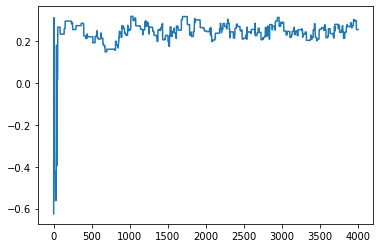

In [28]:
plt.plot(t[2][:,1,0])

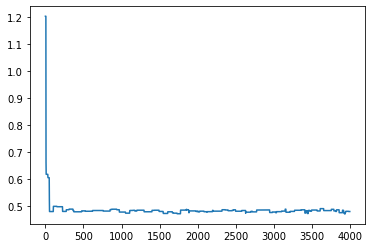

In [10]:
plt.plot(t[2][:,1,1])

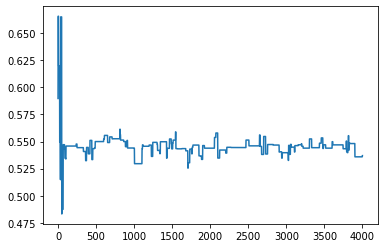

In [11]:
plt.plot(t[2][:,1,2])

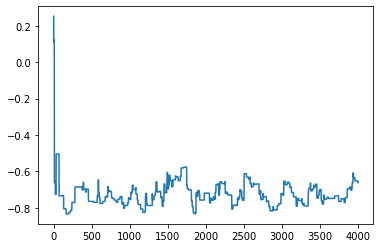

In [12]:
plt.plot(t[2][:,1,3])

In [29]:
plt.hist(test[:,3], bins = 30)

NameError: name 'test' is not defined

In [30]:
test = np.reshape(t[2][2000:3999, 3:18, :],newshape = (-1, 5))

In [31]:
t[2].shape

(4000, 20, 5)

In [32]:
test.shape

(29985, 5)

In [213]:
def get_W(chains):
    return np.sum(np.square((chains - np.mean(chains, axis = 1, keepdims = 1))), axis = (0, 1)) / (chains.shape[0] * (chains.shape[1] - 1))
    
def get_B_div_n(chains):
    return np.sum(np.square(np.mean(chains, axis = 1, keepdims = 1) - np.mean(chains, axis = (0,1), keepdims = 1)), axis = (0, 1)) / (chains.shape[0] - 1)
    
def get_gelman_rubin_univ(chains, 
                          burn_in = 1000):
    W = get_W(chains[:, burn_in:, :])
    B_div_n = get_B_div_n(chains[:, burn_in:, :])
    V = (chains[:, burn_in:, :].shape[1] - 1) / chains[:, burn_in:, :].shape[1] * W + B_div_n 
    R_hat = V / W
    return R_hat

In [8]:
diag_.get_gelman_rubin_mv(t_swapped, burn_in = 1000)

(0, 1.0065918828633091)

In [4]:
t_swapped = np.swapaxes(t[2],0, 1)

In [5]:
t_swapped.shape
t_swapped = t_swapped[3:18, :, :]

In [35]:
#(t_swapped[:,1,:] 
W = np.sum(np.square((t_swapped - np.mean(t_swapped, axis = 1, keepdims = 1))), axis = (0, 1)) / (t_swapped.shape[0] * (t_swapped.shape[1] - 1))

In [36]:
B_div_n = np.sum(np.square(np.mean(t_swapped, axis = 1, keepdims = 1) - np.mean(t_swapped, axis = (0,1), keepdims = 1)), axis = (0, 1)) / (t_swapped.shape[0] - 1)

In [37]:
V = (t_swapped.shape[1] - 1) / (t_swapped.shape[1]) * W + B_div_n

In [38]:
V / W

array([1.06130532, 1.02016818, 1.04186833, 1.05915103, 1.03040361])

In [127]:
B / t_swapped.shape[1]

array([1.67361155e-06, 8.67288567e-08, 1.33998623e-08, 9.48741919e-05,
       4.50000222e-08])

In [95]:
W

array([0.04295023, 0.00741185, 0.00091622, 0.02183918, 0.00543918])

In [97]:
B

array([6.69444620e-03, 3.46915427e-04, 5.35994493e-05, 3.79496768e-01,
       1.80000089e-04])

In [99]:
V

array([0.04294117, 0.00741008, 0.000916  , 0.0219286 , 0.00543786])

In [ ]:
np.cov()

In [40]:
t_swapped.shape

(15, 3500, 5)

In [11]:
def get_W_mv(chains):
    tmp = np.zeros((chains.shape[2], chains.shape[2]))
    for i in range(chains.shape[0]):
        tmp += np.cov(chains[i].T)
    return tmp / chains.shape[0]

In [12]:
W_mv = get_W_mv(chains = t_swapped)

In [13]:
def get_B_div_n_mv(chains):
    phi_dot = np.mean(chains, axis = 1)
    #phi_dot_dot = np.mean(phi_dot, axis = 0)
    return np.cov(phi_dot.T) / chains.shape[0]  

In [18]:
def get_gel_rub_mv(chains):
    W = get_W_mv(chains)
    B_div_n = get_B_div_n_mv(chains)
    W_inv = np.linalg.inv(W)
    lambda_1 = np.sort(np.linalg.eigvals(np.dot(W_inv, B_div_n)))[-1]
    print(np.sort(np.linalg.eigvals(np.dot(W_inv, B_div_n))))
    print(lambda_1)
    R_hat = (chains.shape[1] - 1) / chains.shape[1] + ((chains.shape[0] + 1) / chains.shape[0]) * lambda_1
    return R_hat

In [19]:
get_gel_rub_mv(t_swapped)

[0.00014434 0.00057147 0.00163968 0.00229057 0.00893636]
0.008936359880899393


1.0092821172062927

In [ ]:
def compute_geweke():

In [8]:
import pycuda.driver as drv
drv.init()
print('Detected {} CUDA Capable device(s)'.format(drv.Device.count()))

for i in range(drv.Device.count()):
     gpu_device = drv.Device(i)
     print('Device {}: {}'.format( i, gpu_device.name() ))
     compute_capability = float( '%d.%d' % gpu_device.compute_capability() )
     print('\t Compute Capability: {}'.format(compute_capability))
     print('\t Total Memory: {} megabytes'.format(gpu_device.total_memory()//(1024**2)))

Device 0: GeForce GTX TITAN X
	 Compute Capability: 5.2
	 Total Memory: 12212 megabytes
Device 1: GeForce GTX TITAN X
	 Compute Capability: 5.2
	 Total Memory: 12212 megabytes
Device 2: GeForce GTX TITAN X
	 Compute Capability: 5.2
	 Total Memory: 12212 megabytes
Device 3: GeForce GTX 670
	 Compute Capability: 3.0
	 Total Memory: 1999 megabytes


In [14]:
device_attributes_tuples = gpu_device.get_attributes().items()
device_attributes = {}
    
for k, v in device_attributes_tuples:
    device_attributes[str(k)] = v

In [15]:
gpu_device.get_attributes().items()
num_mp = device_attributes['MULTIPROCESSOR_COUNT']

In [16]:
num_mp

7

In [17]:
compute_capability

3.0

In [18]:
cuda_cores_per_mp = {3.0: 16, 5.0 : 128, 5.1 : 128, 5.2 : 128, 6.0 : 64, 6.1 : 128, 6.2 : 128}[compute_capability]

In [19]:
cuda_cores_per_mp

16

In [20]:
print('\t ({}) Multiprocessors, ({}) CUDA Cores / Multiprocessor: {} CUDA Cores'.format(num_mp, cuda_cores_per_mp, num_mp * cuda_cores_per_mp))
 

	 (7) Multiprocessors, (16) CUDA Cores / Multiprocessor: 112 CUDA Cores


In [22]:
device_attributes.pop('MULTIPROCESSOR_COUNT')
for k in device_attributes.keys():
    print('\t {}: {}'.format(k, device_attributes[k]))

	 ASYNC_ENGINE_COUNT: 1
	 CAN_MAP_HOST_MEMORY: 1
	 CLOCK_RATE: 980000
	 COMPUTE_CAPABILITY_MAJOR: 3
	 COMPUTE_CAPABILITY_MINOR: 0
	 COMPUTE_MODE: DEFAULT
	 CONCURRENT_KERNELS: 1
	 ECC_ENABLED: 0
	 GLOBAL_L1_CACHE_SUPPORTED: 0
	 GLOBAL_MEMORY_BUS_WIDTH: 256
	 GPU_OVERLAP: 1
	 INTEGRATED: 0
	 KERNEL_EXEC_TIMEOUT: 1
	 L2_CACHE_SIZE: 524288
	 LOCAL_L1_CACHE_SUPPORTED: 1
	 MANAGED_MEMORY: 1
	 MAXIMUM_SURFACE1D_LAYERED_LAYERS: 2048
	 MAXIMUM_SURFACE1D_LAYERED_WIDTH: 65536
	 MAXIMUM_SURFACE1D_WIDTH: 65536
	 MAXIMUM_SURFACE2D_HEIGHT: 32768
	 MAXIMUM_SURFACE2D_LAYERED_HEIGHT: 32768
	 MAXIMUM_SURFACE2D_LAYERED_LAYERS: 2048
	 MAXIMUM_SURFACE2D_LAYERED_WIDTH: 65536
	 MAXIMUM_SURFACE2D_WIDTH: 65536
	 MAXIMUM_SURFACE3D_DEPTH: 2048
	 MAXIMUM_SURFACE3D_HEIGHT: 32768
	 MAXIMUM_SURFACE3D_WIDTH: 65536
	 MAXIMUM_SURFACECUBEMAP_LAYERED_LAYERS: 2046
	 MAXIMUM_SURFACECUBEMAP_LAYERED_WIDTH: 32768
	 MAXIMUM_SURFACECUBEMAP_WIDTH: 32768
	 MAXIMUM_TEXTURE1D_LAYERED_LAYERS: 2048
	 MAXIMUM_TEXTURE1D_LAYERED_WIDTH: 

In [22]:
acf(t_swapped[0, :, :])

/home/afengler/miniconda3/envs/pytorch/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


ValueError: x is required to have ndim 1 but has ndim 2

In [40]:
t_swapped.shape[1] / (1 + 2 * np.sum(acf(t_swapped[0, 500:, 0], nlags = 200)))

42.29423329027796

In [41]:
acf_vals = acf(t_swapped[0, 1000:, 0], nlags = 200)



In [58]:
len(np.argwhere(acf_vals < -.01))

10

In [21]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [15]:
mod = AutoReg(t_swapped[0, :, 2].T, 100)
res = mod.fit()

In [28]:
sel = ar_select_order(t_swapped[0, :, 1],maxlag = 10, seasonal = False)
sel.ar_lags
res = sel.model.fit()

AttributeError: 'AutoRegResults' object has no attribute 'sd'

In [60]:
np.random.normal(loc = 0 , scale = [0.1, 1, 20], size = 3)

array([ 0.38502249, -1.35027308, -8.09199891])

In [63]:
np.array([0, 1, 2]).shape

(3,)

In [29]:
res.__dict__.keys()

dict_keys(['_results', '__doc__'])

In [34]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 3500
Model:                     AutoReg(1)   Log Likelihood               21380.195
Method:               Conditional MLE   S.D. of innovations              0.001
Date:                Mon, 27 Jan 2020   AIC                            -15.057
Time:                        18:34:02   BIC                            -15.052
Sample:                             1   HQIC                           -15.055
                                 3500                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0078      0.001      5.318      0.000       0.005       0.011
y.L1           0.9838      0.003    322.906      0.000       0.978       0.990
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0165           +0.0000j            1.0165            0.0000
-----------------------------------------------------------------------------
"""

In [51]:
res.params

array([0.00781153, 0.98379882])

In [52]:
res.sigma2

2.8848486721030227e-07

In [55]:
#res.sigma2 / np.square(1 - np.sum(res.params[1:]))

0.0010990816295487348

In [198]:
def get_geweke_diags(chains, 
                     split = 0.3, 
                     skip = 0.5):
    
    """Function computes geweke statistic for markov chains"""
    # Check dimensionality of chains
    # If single chain add dimesion
    n_dims = len(chains.shape)
    if n_dims == 2:
        chains = np.expand_dims(chains, axis = 0)

    # Compute split demarcations as integers to be used for indexing
    n_floor = int(chains.shape[1] * (split + skip))
    n_skip = int(chains.shape[1] * (skip))
    
    # Initialize the vector in which we store z-scores
    z_scores = np.zeros(chains.shape[0] * chains.shape[2])
    
    # Main loop that computes statistics of interest
    for i in range(chains.shape[0]):
        for j in range(chains.shape[2]):
            # Get Autoregression coefficients for each part of split of chain
            sel_1 = ar_select_order(chains[i, n_skip:n_floor, j], maxlag = 10, seasonal = False)
            sel_2 = ar_select_order(chains[i, n_floor:, j], maxlag = 10, seasonal = False)
            res_1 = sel_1.model.fit()
            res_2 = sel_2.model.fit()
            
            # Compute the Autoregression corrected respective standard deviations
            s_1 = res_1.sigma2 / np.square(1 - np.sum(res_1.params[1:]))
            s_2 = res_2.sigma2 / np.square(1 - np.sum(res_2.params[1:]))
            
            # Compute (absolute) z scores that form the basis of the test of whether or not to continue sampling
            z_scores[i * chains.shape[2] + j] = np.abs((np.mean(chains[i, n_skip:n_floor, j]) - np.mean(chains[i, n_floor:, j])) / np.sqrt((1 / (n_floor - n_skip)) * s_1  + (1 / (chains.shape[1] - n_floor)) * s_2))
    
    # Continuation check: All absolute z scores below 2? If yes stop sampling
    continue_ = int((np.sum(z_scores > 2)) > 0)
    return continue_, z_scores

In [196]:
c, z = get_geweke_diags(chains = t_swapped[7, :, :])

(1, 3500, 5)


In [223]:
z,c

(array([0.83208228, 0.37451127, 0.32953347, 1.02749706, 0.93862603]), 0)

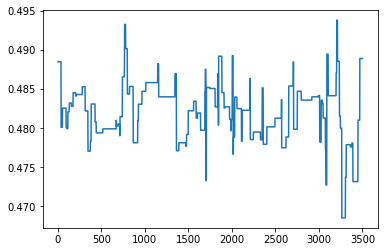

In [110]:
plt.plot(t_swapped[10, :, 1])

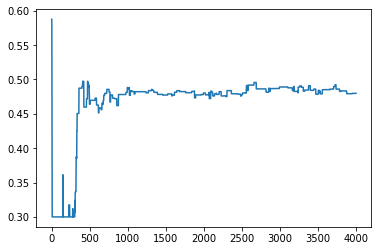

In [79]:
plt.plot(t[2][:, 6, 1])

In [76]:
dia_

(4000, 20, 5)